# Non Profit Crowdfunding Recommendation System for DonorsChoose.org 

https://www.donorschoose.org/


<img src="files/donorschooselogo.png">

### Contents

1. [Background](#Background)
2. [Key Business Questions](#KBQs)
3. [Data Overview](#Data_Overview)
4. [Exploratory Data Analysis](#EDA)
5. [Data Pre-processing](#data-preprocessing)
6. [Recommendation Systems](#recommendation_system)

    i. [Content Based Recommendation System](#cbf)    
    ii. [Collaborative Recommendation System](#cf)
    
    
7. Evaluation Criteria 
8. Conclusions

<a id='Background'></a>

### 1. Background

Founded in 2000 by a high school teacher in Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. It allows individuals to donate directly to public schools all over America and actually see how very dollar was spent. Since 2000, DonorsChoose.org has vetted and fulfilled over 1.1 Million classroom project requests (through the support of ~ 3 Million donors) that range from butterfly cocoons, to robotics kits, to Little House on the Prairie. 

However, public school teachers in the US still spend ~ **$1.6B** of their own money on classroom supplies. To get students what they need to learn, DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.

<a id='KBQs'></a>

### 2. Key Business Questions

1. How to pair up classroom requests to donors that will motivate them most to make additional donations?
2. How to understand the interests of different donors to help them make better donation decisions?

The above questions will eventually help answer the key decision of - *Building targeted email campaigns recommending specific classroom requests to prior donors.*

<a id='Data_Overview'></a>

### 3. Data Overview

Source - https://www.kaggle.com/donorschoose/io

DonorsChoose.org has shared 1.2 GB of data with the following csv files -

1. Donations.csv - Contains a projectid, donorid, donation amount and donation received date for every donation 
2. Donors.csv - Contains information about every donors such as donorids, location (city ,state and zip), and whether the donor is a teacher 
3. Projects.csv - Contains information about every project such as projectid, title, description, project category, funding needed, project start and finish dates, etc. 
4. Resources.csv - Contains additional details for the resources and their quantity requested in every project
5. Schools.csv - Contains additional information at school level
6. Teachers.csv - Contians teacherid, their gender and the date when they first posted a project

<a id='EDA'></a>
### 4. EDA

Let us first import the required libraries and import the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sys

In [2]:
#projects.head(n=1)
#projects.shape
#projects.isna().sum()
#projects.apply(lambda x: x.nunique())
#projects.groupby('Project Grade Level Category')['Project ID'].count()
#projects.groupby('Project Type')['Project ID'].count()

In [2]:
# Read datasets
projects = pd.read_csv('Original data\Projects.csv')
donations = pd.read_csv('Original data\Donations.csv')
donors = pd.read_csv('Original data\Donors.csv')
resources = pd.read_csv('Original data\Resources.csv')
schools = pd.read_csv('Original data\Schools.csv')
donors = pd.read_csv('Original data\Donors.csv')
teachers = pd.read_csv('Original data\Teachers.csv')

C:\Users\bandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### We will explore each file and then look at the combined data later

### a.) Projects

In [3]:
print ('The total number of projects present in the projects file are', projects['Project ID'].nunique())

The total number of projects present in the projects file are 1110015


### 1. What are the most frequent project categories and sub-categories?

A majority of the projects are for literacy, language, math & science.

Text(0.5,0,'# of Projects')

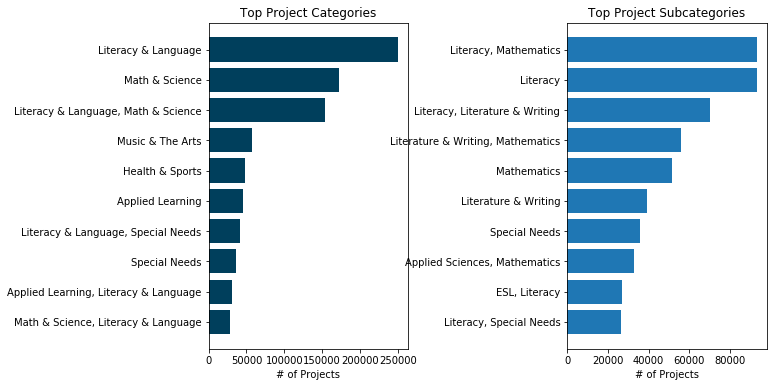

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw={'wspace': 0.8, 'hspace': 1})

x1 = projects['Project Subject Category Tree'].value_counts().sort_values().tail(10).index
y1 = projects['Project Subject Category Tree'].value_counts().sort_values().tail(10).values

x2 = projects['Project Subject Subcategory Tree'].value_counts().sort_values().tail(10).index
y2 = projects['Project Subject Subcategory Tree'].value_counts().sort_values().tail(10).values

axes[0].barh(x1,y1, color =  '#003f5c')


axes[0].set_xlabel('# of Projects')
axes[0].set_title('Top Project Categories')

axes[1].barh(x2,y2)
axes[1].set_title('Top Project Subcategories')
axes[1].set_xlabel('# of Projects')

### 2. How have the number of projects grown over time?

Over time from 2013 to 2017, the number of project requests have steadily risen, clearly showing increased popularity and importance of this platform.

In [5]:
# Converting posted date to date-time object, so that we can carry out date/time operations
projects['Project Posted Date'] = pd.to_datetime(projects['Project Posted Date'])
projects['Posted year'] = projects['Project Posted Date'].dt.year

Text(0,0.5,'# of Projects')

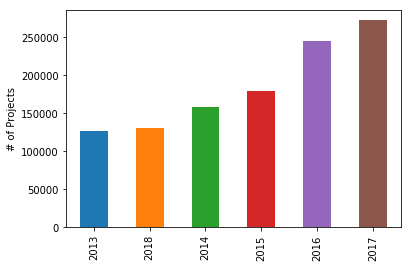

In [6]:
projects['Posted year'].value_counts().sort_values().plot(kind = 'bar')
plt.ylabel('# of Projects')

### 3. What is the current status of all the projects? 

About 70% of the projects get full funding, while remaining 30% are either still LIVE or have expired without full funding.

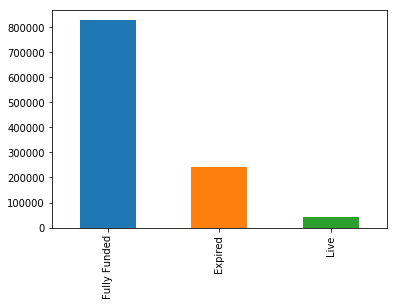

In [7]:
projects['Project Current Status'].value_counts().plot(kind = 'bar')

### b.) Donations

In [8]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [9]:
print ('Total number of donations are', donations['Donation ID'].nunique())

Total number of donations are 4687844


### 1. What are the top donation amounts?

Majority of donation amounts are whole numers such 25 USD, 50 USD or 10 USD. This makes sense as most of the option given by the website are typically whole numbers

Text(0.5,0,'Donation Amount')

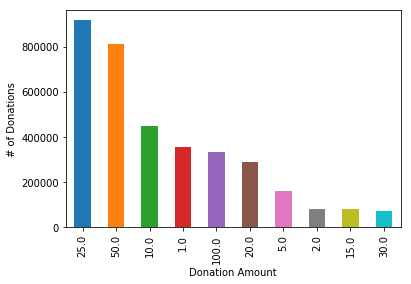

In [10]:
donations ['Donation Amount'].value_counts().head(10).plot(kind = 'bar')
plt.ylabel('# of Donations')
plt.xlabel('Donation Amount')

### 2. Which projects receive the maximum number and maximum amount of donations?

Project titled Vallecito StandUpKids Pilot Standing School! received the max # of donations. This porject deals with getting the right sized desks for their studens so that the students can move from one place to another easily. The project cost was 110K USD.

Interestingly the same project also had the maximum donation amount in USD.


In [11]:
donations_count_amount = donations.groupby('Project ID').agg({'Project ID' : 'count',\
                                     'Donation Amount' : 'sum'}).rename(columns={'Project ID' : "Total Donations",\
                                                                                 'Donation Amount' : "Total Amount"})

Text(0.5,1,'Project with maximum number of donations ')

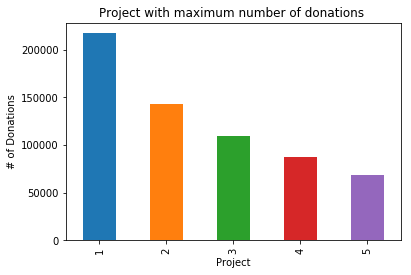

In [12]:
donations_count_amount['Total Donations'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Project')
plt.ylabel('# of Donations')
plt.title ('Project with maximum number of donations ')

In [13]:
print ('The project with maximum # of donations is:')
projects[projects['Project ID'] == donations_count_amount['Total Donations'].idxmax()]

The project with maximum # of donations is:


,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Posted year
337798,c34218abf3fecd36be01305d67ed7fbb,e5d780f83322945f54d4ffb02765371b,7fe6dd0c1af5f911e9bc38030cfb4ced,1,Teacher-Led,Vallecito StandUpKids Pilot Standing School!,"In order for children to learn, they need to m...","In order for children to learn, they need to m...",My students need standing desks for every chil...,"Health & Sports, Literacy & Language","Health & Wellness, Literacy",Grades 3-5,Supplies,110075.19,2015-05-26,2015-10-24,Fully Funded,2015-08-12,2015


Text(0.5,1,'Project with maximum amount of donations ')

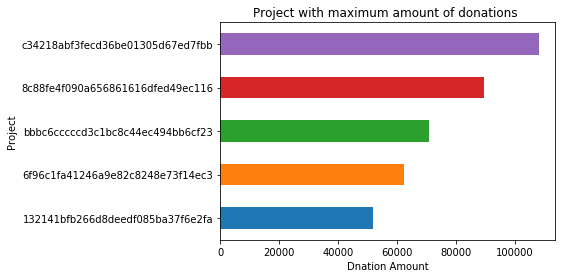

In [14]:
donations_count_amount['Total Amount'].sort_values().tail(5).plot(kind='barh')
plt.xlabel('Dnation Amount')
plt.ylabel('Project')
plt.title ('Project with maximum amount of donations ')

In [15]:
print ('The project with maximum donation amount is:')
projects[projects['Project ID'] == donations_count_amount['Total Amount'].idxmax()]

The project with maximum donation amount is:


,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Posted year
337798,c34218abf3fecd36be01305d67ed7fbb,e5d780f83322945f54d4ffb02765371b,7fe6dd0c1af5f911e9bc38030cfb4ced,1,Teacher-Led,Vallecito StandUpKids Pilot Standing School!,"In order for children to learn, they need to m...","In order for children to learn, they need to m...",My students need standing desks for every chil...,"Health & Sports, Literacy & Language","Health & Wellness, Literacy",Grades 3-5,Supplies,110075.19,2015-05-26,2015-10-24,Fully Funded,2015-08-12,2015


### 3. What are the most frequent # of donations made by donors? 

Clearly as we can see most of the donors just make 1 donation. While a few others make 2 donations. There clearly is a huge potential for these donors who are donating only once to target again and motivate them to donate more. This also shows how sparse our data is. It is important to keep this in mind when we go into the recommendation systems


In [16]:
frequency_count = {}
for i in range (10):
    frequency_count[str(i+1)] = (donations['Donor ID'].value_counts()  ==  i+1).sum()

Text(0,0.5,'Frequency')

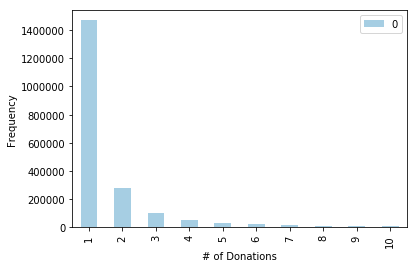

In [17]:
pd.DataFrame(frequency_count, index = [0]).T.plot(kind = 'bar',colormap = 'Paired')
plt.xlabel('# of Donations')
plt.ylabel('Frequency')

### 4. Which states receive the highest  total donation amounts?

As expected California, New York and Texas have the highest total donations, mostly due to the sheer size and population of these states. 

In [18]:
donations_donor_df = donations.merge(donors, on = 'Donor ID', how = 'inner')

Text(0,0.5,'Total Donation Amount')

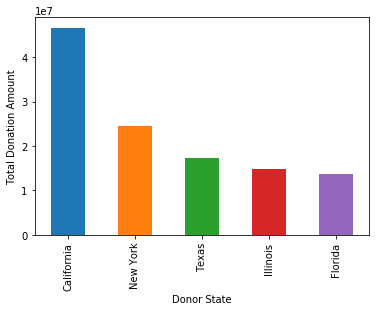

In [19]:
donations_donor_df.groupby('Donor State').agg({'Donation Amount':'sum'})['Donation Amount'].\
sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.ylabel('Total Donation Amount')

In [20]:
import io
from io import StringIO

# Let us first get the latitude and longitude for each State. We will then plot them on the map.

statesll=StringIO("""State,Latitude,Longitude
Alabama,32.806671,-86.791130
Alaska,61.370716,-152.404419
Arizona,33.729759,-111.431221
Arkansas,34.969704,-92.373123
California,36.116203,-119.681564
Colorado,39.059811,-105.311104
Connecticut,41.597782,-72.755371
Delaware,39.318523,-75.507141
District of Columbia,38.897438,-77.026817
Florida,27.766279,-81.686783
Georgia,33.040619,-83.643074
Hawaii,21.094318,-157.498337
Idaho,44.240459,-114.478828
Illinois,40.349457,-88.986137
Indiana,39.849426,-86.258278
Iowa,42.011539,-93.210526
Kansas,38.526600,-96.726486
Kentucky,37.668140,-84.670067
Louisiana,31.169546,-91.867805
Maine,44.693947,-69.381927
Maryland,39.063946,-76.802101
Massachusetts,42.230171,-71.530106
Michigan,43.326618,-84.536095
Minnesota,45.694454,-93.900192
Mississippi,32.741646,-89.678696
Missouri,38.456085,-92.288368
Montana,46.921925,-110.454353
Nebraska,41.125370,-98.268082
Nevada,38.313515,-117.055374
New Hampshire,43.452492,-71.563896
New Jersey,40.298904,-74.521011
New Mexico,34.840515,-106.248482
New York,42.165726,-74.948051
North Carolina,35.630066,-79.806419
North Dakota,47.528912,-99.784012
Ohio,40.388783,-82.764915
Oklahoma,35.565342,-96.928917
Oregon,44.572021,-122.070938
Pennsylvania,40.590752,-77.209755
Rhode Island,41.680893,-71.511780
South Carolina,33.856892,-80.945007
South Dakota,44.299782,-99.438828
Tennessee,35.747845,-86.692345
Texas,31.054487,-97.563461
Utah,40.150032,-111.862434
Vermont,44.045876,-72.710686
Virginia,37.769337,-78.169968
Washington,47.400902,-121.490494
West Virginia,38.491226,-80.954453
Wisconsin,44.268543,-89.616508
Wyoming,42.755966,-107.302490""")

sdf = pd.read_csv(statesll).rename(columns={'State':'Donor State'})

In [21]:
tempdf = donations_donor_df.groupby('Donor State').agg({'Donation Amount':'sum'})['Donation Amount'].\
sort_values(ascending = False).reset_index()
sdf = sdf.merge(tempdf, on = 'Donor State', how = 'inner')

In [22]:
# Plot the map to show the magnitude of donations from each state. Larger the circle, higher is the total donation amount
import folium  
from IPython.display import HTML, display

map4 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
for j, rown in sdf.iterrows():
    rown = list(rown)
    folium.CircleMarker([float(rown[1]), float(rown[2])], popup=rown[0]+": $"+str(int(rown[3])), radius=float(rown[3])*0.000001, color='red', fill=True).add_to(map4)
map4

### c.) Donors

In [23]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [24]:
print ('Total number of donors are', donors['Donor ID'].nunique())

Total number of donors are 2122640


<a id='data-preprocessing'></a>
### 5. Data Pre-processing

### a.) Creating a sample data set

We will randomly take 50000 donors to create a sample. This is done to redice the size of the data set, otherwise we will be needing higher computational resources.

In [3]:
# # #this piece of code converts Project_ID which is a 32-bit Hex int digits 10-1010
# # # create column "project_id" with sequential integers
# # f=len(projects)
# # projects['project_id'] = np.nan
# # g = list(range(10,f+10))
# # g = pd.Series(g)
# # projects['project_id'] = g.values

# # Merge datasets
# donations1 = donations.merge(donors, on="Donor ID", how="left")
# df = donations1.merge(projects,on="Project ID", how="left")


# #Create a sample from all datasets for a random sample of 50,000 donors

# donor_ID = tuple(df['Donor ID'].unique())
# donor_ID_sample = random.sample(donor_ID, 50000)

# df_sample = df[df['Donor ID'].isin(donor_ID_sample)]
# # df_sample.shape = ((588334, 27))
# donations_sample = donations[donations['Donation ID'].isin(df_sample['Donation ID'])]
# donors_sample = donors[donors['Donor ID'].isin(df_sample['Donor ID'])]
# projects_sample = projects[projects['Project ID'].isin(df_sample['Project ID'])]
# resources_sample = resources[resources['Project ID'].isin(df_sample['Project ID'])]
# schools_sample = schools[schools['School ID'].isin(df_sample['School ID'])]
# teachers_sample = teachers[teachers['Teacher ID'].isin(df_sample['Teacher ID'])]

# print (df_sample.columns)
# print ('donations:',donations_sample.shape,'\n','donors:',donors_sample.shape,'\n','projects:',projects_sample.shape,'\n',\
#       'resources:',resources_sample.shape,'\n','schools:',schools_sample.shape,'\n','teachers:',teachers_sample.shape,'\n',\
#       'df_sample:',df_sample.shape)

C:\Users\garga\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exporting sample data to csv

In [6]:
# donations_sample.to_csv(r'Datasets\Sample\Donations.csv')
# donors_sample.to_csv(r'Datasets\Sample\Donors.csv')
# projects_sample.to_csv(r'Datasets\Sample\Projects.csv')
# resources_sample.to_csv(r'Datasets\Sample\Resources.csv')
# schools_sample.to_csv(r'Datasets\Sample\Schools.csv')
# teachers_sample.to_csv(r'Datasets\Sample\Teachers.csv')
# df_sample.to_csv(r'Datasets\Sample\df_sample.csv')

### Importing sample data from csv

In [2]:
df_sample = pd.read_csv('df_sample.csv')
projects_sample = pd.read_csv('Projects.csv')

In [3]:
#projects = pd.read_csv('Original data\Projects.csv')
#projects_sample = projects[projects['Project ID'].isin(df_sample['Project ID'])]

In [33]:
projects_sample.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Posted year
9,60dddb9495e5ed60c1f6c1b86fe9a7e4,0eef7b3d950954a033fc8642dea3be03,1c822ca44ec40dd3281470af34abf325,1,Teacher-Led,Little Learners Love To Listen To Literature,Do you remember when your parents read bedtime...,Do you remember when your parents read bedtime...,My students need tag readers to use during ind...,Literacy & Language,"ESL, Literacy",Grades PreK-2,Books,566.73,2013-01-01,2013-05-30,Fully Funded,2013-05-24,2013
20,d3fc101ea24e26443dbfe9bc7560d08c,cb1db2e3c1b355efb4e6f7b484ebf20d,9d7051e2611cebdb758f1c7bd09360ac,146,Teacher-Led,Flutter By Butterfly,I teach first grade at an AMAZING public schoo...,I teach first grade at an AMAZING public schoo...,My students need live painted lady butterflies...,"Math & Science, Literacy & Language","Environmental Science, Literacy",Grades PreK-2,Supplies,231.60,2013-01-01,2013-05-31,Fully Funded,2013-01-28,2013
23,9bababc22886d0653f6ef4963c33b308,1542be347524325ceca9e2b98df02fae,edd5326ed3496ebe4dbde8907f695373,2,Teacher-Led,Technology in the Classroom,It amazes me how children today know so much a...,It amazes me how children today know so much a...,My students need an iPad and case to aid in sm...,"Literacy & Language, Math & Science","Literacy, Mathematics",Grades PreK-2,Technology,980.35,2013-01-01,2013-05-30,Fully Funded,2013-01-21,2013
45,b7b526a3ea534c4ec79cac671f188a63,560f887fe5bfc87842af2e771023ff43,bfc442dc5749d40255b414478824f6a5,9,Teacher-Led,Writing Against Bullying!,Bullying can cause devastating emotional and p...,Bullying can cause devastating emotional and p...,My students need the books Bullying in Schools...,"Literacy & Language, History & Civics","Literature & Writing, Social Sciences",Grades PreK-2,Books,524.05,2013-01-01,2013-05-31,Fully Funded,2013-03-18,2013
64,f1a8293b138176e70b39af9e29d770b0,a95bbcac24cf7364a0b7f5ec286f6e0e,c974bd455eb1caf726fe461046ec2654,1,Teacher-Led,"Learning the Lesson of Individuality through ""...",Remember being in middle school--you know that...,Remember being in middle school--you know that...,"My students need 70 copies of the book ""Diverg...",Literacy & Language,Literature & Writing,Grades 6-8,Books,693.58,2013-01-01,2013-05-30,Fully Funded,2013-01-12,2013


In [3]:
df_sample.sort_values(['Donation Received Date', 'Project Posted Date'],inplace=True)

In [4]:
#number of times a donor has donated - total number of donors for each such value
print (df_sample.groupby('Donor ID')['Donation ID'].count().value_counts().head())
print (df_sample.groupby(['Donor ID','Project ID'])['Donation ID'].count().value_counts().head())

1    36395
2     6832
3     2419
4     1212
5      733
Name: Donation ID, dtype: int64
1    87068
2     4759
3     1222
4      553
5      329
Name: Donation ID, dtype: int64


In [5]:
print(df_sample['Project Posted Date'].min())
print(df_sample['Project Posted Date'].max())
print(df_sample['Donation Received Date'].min())
print(df_sample['Donation Received Date'].max())

2013-01-01
2018-05-01
2012-10-13 16:01:39
2018-05-09 11:20:25


#### Is the donation date earlier than project posted date?

In [6]:
df_tmp = (pd.to_datetime(df_sample['Donation Received Date']) - pd.to_datetime(df_sample['Project Posted Date'])).dt.days
df_tmp = df_tmp.to_frame().rename(columns={0:'delay'})
df_tmp.loc[df_tmp['delay']<0, 'delay'].count()

111

There are 111 such projects where the donation date is before the project posted date. This is weird!!

In [7]:
# # transform date into integer for better performance
# date_feats = ['Project Posted Date','Project Expiration Date','Project Fully Funded Date','Donation Received Date']
# for i in date_feats:
#     df_sample[i] = pd.to_datetime(df_sample[i])
#     df_sample[i] = (df_sample[i].astype(np.int64,copy=False)// 10 ** 9).astype(np.int32,copy=False)

<a id='recommendation_system'></a>
## 6. Recommendation Systems 

<a id='cbf'></a>
### i.) Content Based Recommendation System

Some important things to note - 

1. We should **not** recommend any project which have been expired
2. We should also **not** recommend the projects which have been fully funded


Overall process for content based recommendation system - 

1. We will first divide our data set into train and test data, so that we can perform tests on our recommendations
2. We will then create a profile for each donor based on the projects they have donated to in the past. For content based recommendation we will look into the descriptions of the projects which were donated by an user and then recommend them projects based on their interests
3. We will use TF-IDF matrix to find the words which motivate a donor to donate the most and create a donor profile. We will then use Cosine Similarity and to identify similar projects and recommend the same 

In [8]:
# We will use eventStrength to give a weight to the donations which have higher eventstrength.
#Eventstrength is defined based on the donation amount.

import math
# Deal with missing values
df_sample["Donation Amount"] = df_sample["Donation Amount"].fillna(0)

# Define event strength as the donated amount to a certain project
df_sample['eventStrength'] = df_sample['Donation Amount']

# We will pass the donation amounts via a logarithmic squishing function to reduce the order of the values.
def smooth_donor_preference(x):
    return math.log(1+x, 2)
    
donations_full_df = df_sample \
                    .groupby(['Donor ID', 'Project ID'])['eventStrength'].sum() \
                    .apply(smooth_donor_preference).reset_index()
donations_full_df.head()

,Donor ID,Project ID,eventStrength
0,00008eec5aab2228652e22457881f2d0,24e7552d1a01bc2bfaaa1fef2fa42d28,5.672425
1,000110c8c5db5d760b313292dbfb24d1,845824318021765a8b3cfcb66c3169c9,4.700440
2,0001abd0c3f256bcdbc75116f2609355,06b1b00c918886cd4850c8ae1bae2d1c,4.700440
3,00027d3b680199e9350bc20fd2454a02,7e538ce993723396701312add5ac935f,4.700440
4,0004f42bf17585076f354d58485129be,e680292474d3073beb6c202c50783ef9,5.672425


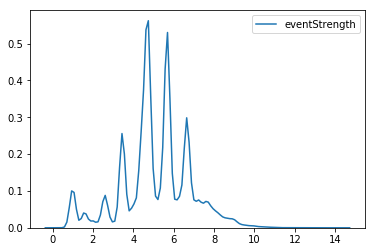

In [9]:
import seaborn as sns
sns.kdeplot(donations_full_df['eventStrength'])

In [10]:
# get Donation-Received-Date
df_tmp = df_sample.groupby(['Donor ID', 'Project ID'])['Donation Received Date'].max().reset_index()
donations_full_df = donations_full_df.merge(df_tmp, on=['Donor ID', 'Project ID'], how='left')

# Indexing by Donor Id to speed up the searches during evaluation
donations_full_df = donations_full_df.set_index('Donor ID')

Now we will split the data into training and test data. Currently we are doing a random split, however an accurate split would be by the time. Older projects should be in train set and newer in test set.

In [11]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
#donations full df is a unique combination of a donor and a project. 
#Does not contain multiple donations by a donor to the same project.

donations_train_df, donations_test_df = train_test_split(donations_full_df, test_size=0.20, random_state=42)

print('# donations on Train set: %d' % len(donations_train_df))
print('# donations on Test set: %d' % len(donations_test_df))

#Indexing by Donor Id to speed up the searches during evaluation
# donations_full_indexed_df = donations_full_df.set_index('Donor ID')
# donations_train_indexed_df = donations_train_df.set_index('Donor ID')
# donations_test_indexed_df = donations_test_df.set_index('Donor ID')

# donations on Train set: 75534
# donations on Test set: 18884


Now we will import the TF-IDF Vectorizer to create a tf-idf matrix  using textual features

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing of text data. We will fill NA in both the 2 columns, convert text to lower case.
textfeats = ["Project Title","Project Essay"]
for cols in textfeats:
    projects_sample[cols] = projects_sample[cols].astype(str) 
    projects_sample[cols] = projects_sample[cols].astype(str).fillna('') # FILL NA
    projects_sample[cols] = projects_sample[cols].str.lower() # Lowercase all text, so that capitalized words dont get treated differently

# Combining the data from project title and project essay to create one comprehensive corpus
text = projects_sample["Project Title"] + ' ' + projects_sample["Project Essay"]
vectorizer = TfidfVectorizer(strip_accents='unicode', # unicode works on any type of character, although its slower
                             analyzer='word', # Whether features should be made of words or character n-grams
                             lowercase=True, # Convert all uppercase to lowercase
                             stop_words='english', # Remove commonly found english words ('it', 'a', 'the') which do not typically contain much signal
                             max_df = 0.9, # Only consider words that appear in fewer than max_df percent of all documents
                             # So ignore words having DF of > 0.9
                             # max_features=5000 # Maximum features to be extracted                    
                            )                        
project_ids = projects_sample['Project ID'].tolist()  #length = 327,439
tfidf_matrix = vectorizer.fit_transform(text)
tfidf_feature_names = vectorizer.get_feature_names()

In [13]:
#Build Donor Profile
import scipy
import sklearn 

def get_project_profile(project_id):
    idx = project_ids.index(project_id)
    project_profile = tfidf_matrix[idx:idx+1]
    return project_profile

def get_project_profiles(ids):
    project_profiles_list = [get_project_profile(x) for x in np.ravel([ids])]
    project_profiles = scipy.sparse.vstack(project_profiles_list)
    return project_profiles

def build_donors_profile(donor_id, donations_indexed_df):
    donations_donor_df = donations_indexed_df.loc[donor_id] #get all donations for a given donor
    donor_project_profiles = get_project_profiles(donations_donor_df['Project ID']) #get project profiles for the list of those donations
    donor_project_strengths = np.array(donations_donor_df['eventStrength']).reshape(-1,1) #get event stregth between each project and donor
    #Weighted average of project profiles by the donations strength
    donor_project_strengths_weighted_avg = np.sum(donor_project_profiles.multiply(donor_project_strengths), axis=0) / (np.sum(donor_project_strengths)+1)
    donor_profile_norm = sklearn.preprocessing.normalize(donor_project_strengths_weighted_avg)
    return donor_profile_norm

#Instantly make your loops show a progress meter - just wrap any iterator with "tqdm(iterator)", and you're done!
from tqdm import tqdm

#building donors profile for all donors using all projects
def build_donors_profiles(): 
    donations_indexed_df = donations_full_df[donations_full_df['Project ID'].isin(projects_sample['Project ID'])]
    donor_profiles = {}
    for donor_id in tqdm(donations_indexed_df.index.unique()):
        donor_profiles[donor_id] = build_donors_profile(donor_id, donations_indexed_df)
    return donor_profiles

donor_profiles = build_donors_profiles()
print("# of donors with profiles: %d" % len(donor_profiles))

100%|██████████| 50000/50000 [05:23<00:00, 154.66it/s]


# of donors with profiles: 50000


### Extract the top 1000 donors based on their total # of donations in the past

Text(0.5,1,'Frequency of donations for top 10 donors')

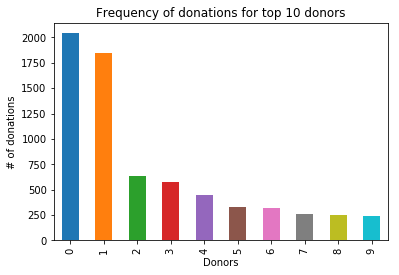

In [52]:
frequent_donors = df_sample['Donor ID'].value_counts().sort_values(ascending = False)[:1000].reset_index()
list_frequent_donors = list(frequent_donors['index'])
frequent_donors['Donor ID'][:10].plot(kind = 'bar')
plt.ylabel('# of donations')
plt.xlabel('Donors')
plt.title('Frequency of donations for top 10 donors')

### What is the total amount donated by top 1000 donors?

We have included the top 1000 donors based on the # of times they have donated in the past. Calculating their total amount donated we realize that one of the sonor has donated as high as 96,540 USD, while he least donation amount is 10 USD.

Text(0.5,1,'Total donations by top donors')

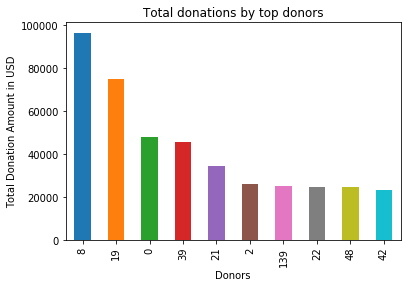

In [50]:
donations_amt_df = pd.DataFrame(columns = ['DonorID','donation_amt'])
for donor in list_frequent_donors:
    donation_amt = df_sample[df_sample['Donor ID'] == donor]['eventStrength'].sum()
    donations_amt_df.loc[len(donations_amt_df)] = [donor,donation_amt]

donations_amt_df['donation_amt'].sort_values(ascending = False)[:10].plot(kind='bar')
plt.ylabel('Total Donation Amount in USD')
plt.xlabel('Donors')
plt.title('Total donations by top donors')

Text(0.5,1,'Total donations by donors ranked among the bottom 10')

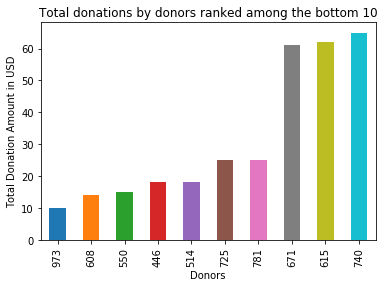

In [57]:
donations_amt_df['donation_amt'].sort_values().head(10).plot(kind='bar')
plt.ylabel('Total Donation Amount in USD')
plt.xlabel('Donors')
plt.title('Total donations by donors ranked among the bottom 10')

### Creating class to identify cosine similarities and recommend projects 

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, projects_df=None):
        self.project_ids = project_ids
        self.projects_df = projects_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_projects_to_donor_profile(self, donor_id, topn=100):
        #Computes the cosine similarity between the donor profile and all project profiles
        cosine_similarities = cosine_similarity(donor_profiles[donor_id], tfidf_matrix)
        #Gets the top similar projects
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Sort the similar projects by similarity
        similar_projects = sorted([(project_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_projects
    
    def recommend_projects(self, donor_id, projects_to_ignore=[], topn=10, verbose=False):
        similar_projects = self._get_similar_projects_to_donor_profile(donor_id)
        #Ignores projects the donor has already donated
        similar_projects_filtered = list(filter(lambda x: x[0] not in projects_to_ignore, similar_projects))
        
        recommendations_df = pd.DataFrame(similar_projects_filtered, columns=['Project ID', 'recStrength']).head(topn)

        recommendations_df = recommendations_df.merge(self.projects_df, how = 'left', 
                                                    left_on = 'Project ID', 
                                                    right_on = 'Project ID')[['recStrength', 'Project ID', 'Project Title', 'Project Essay']]


        return recommendations_df

### Examples to show that the donors for whom we have enough past data, content based filtering seems to work really well 

In [76]:
#for donor in list_frequent_donors:
mydonor1 = frequent_donors['index'][991]
mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
print(mydonor1_profile)

# Creating the instance of class ContentBasedRecommender
cbr_model = ContentBasedRecommender(projects_sample)
top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project Title']


        token  relevance
0      hungry   0.188443
1        food   0.170061
2      asking   0.149760
3          94   0.144453
4         gap   0.139614
5     healthy   0.133335
6      school   0.127986
7  distracted   0.114918
8    physical   0.114890
9  hatchimals   0.112521


In [110]:
#for donor in list_frequent_donors:
mydonor1 = frequent_donors['index'][100]
mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
print('The profile of the donors is below - \n',mydonor1_profile)

# Creating the instance of class ContentBasedRecommender
cbr_model = ContentBasedRecommender(projects_sample)
top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project Title']

The profile of the donors is below - 
        token  relevance
0     school   0.198621
1    reading   0.191416
2   supplies   0.130821
3       help   0.128525
4       need   0.121263
5  classroom   0.121018
6       make   0.118556
7       read   0.106148
8      books   0.104484
9      learn   0.104431


In [113]:
print ("The top projects recommended to this donor are \n\n", top_projects_recommended)

The top projects recommended to this donor are 

 0                       help us become better readers!
1    learning to be bilingual: two is better than one!
2                      loving literacy in first grade!
3              new classroom needs books and supplies!
4                               school supplies needed
5                   math and reading in the real world
6                      books going beyond just reading
7             take a look and help us read more books 
8           help first graders become lifelong readers
9                   creating a comfy classroom library
Name: Project Title, dtype: object


In [107]:
# Exporting top recommendations to csv
top_projects_recommended.to_csv('top_projects_recommended_1.csv')

### Calculate Average Precision@10 And Recall@10 for top 1000 donors

Reference - http://fastml.com/what-you-wanted-to-know-about-mean-average-precision/

1. Precision @K  = Predicted Positives / Total Predictions

Example: If out of 10 total recommendations, 7 are correctly predicted (or in other words are actually relevant), then Precision = 70% 

2. Recall @K = Predicted Posiives / True Positives

E.g - If out of 20 relevant recommendations, 5 are correctly predicted, then Recall = 5*100/20 = 25%

We then calculate average precision and recall across all donors

In [100]:
recommended_match_count = pd.DataFrame(columns = ['DonorID','Precision','Recall'])
for donor in list_frequent_donors:
    mydonor1 = donor
    mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
    # Creating the instance of class ContentBasedRecommender
    cbr_model = ContentBasedRecommender(projects_sample)
    top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project ID']
    projects_actually_donated = df_sample[df_sample['Donor ID'] == donor]['Project ID'].unique()
    count = 0
    for top_project in top_projects_recommended:
        if top_project in projects_actually_donated:
            count = count + 1 
    recall = round(100*count/len(projects_actually_donated),2)
    recommended_match_count.loc[len(recommended_match_count)] = [donor,count,recall]      

In [102]:
recommended_match_count['Precision'] = recommended_match_count['Precision']/10

In [106]:
print('Average Precision of top 1000 recommendations',round(100*recommended_match_count['Precision'].mean(),2),'%')
print('Average Recall of top 1000 recommendations is ',round(recommended_match_count['Recall'].mean(),2),'%')

Average Precision of top 1000 recommendations 58.16 %
Average Recall of top 1000 recommendations is  54.83 %


In [24]:
recommended_match_count.to_csv('Content_based_filtering_recommendations_match_rate.csv')

<a id='cf'></a>
### ii.) Collaborative Filtering

In this approach, models are developed using machine learning algorithms to predict user's rating (or the metric of interest) of unrated items, which are evntually used to recommend items (projects to donors in this case). There are many model-based CF algorithms. 

In simpler words - *In the context of recommendation systems, collaborative filtering is a method of making predictions about the interests of user by analysing the taste of users which are similar to the said user*. The idea of filtering patterns by collaborating multiple viewpoints is why it is called collaborative filtering.


They can be divided into 3 categories - 

1. Clustering based - Eg. KNN
2. Matrix Factorization based - Eg. SVD, Probabilistic Matrix Factorization, Non -ve matrix factorization
3. Deep Learning based - Eg. - Neural Networks

 - **Matrix Factorization**: The idea behind such models is that attitudes or preferences of a user can be determined by a small number of hidden factors. We can call these factors as **Embeddings**. In SVD we adopt a latent factor model, which compresses donor-project matrix into a low-dimensional representation in terms of latent factors. A reduced presentation could be utilized for either donor-based or project-based neighborhood searching algorithms to find recommendations. Here we a use popular latent factor model named Singular Value Decomposition (SVD).

    Matrix decomposition can be reformulated as an optimization problem with loss functions and constraints. Now the constraints are chosen based on property of our model. For e.g. for Non negative matrix decomposition, we want non negative elements in resultant matrices.



Some common Collaborative Filtering Algortihms - 

1. Probabilistic Matrix Factorization
2. Singular Value Decomposition
3. Deep Learning Based

### Step 1: Create donor-project matrix

In [266]:
# Only taking 9000 eneries due to memory constraints. But the idea and code remains same
donations_full_df_sample = donations_full_df.reset_index()[:9000]

In [267]:
#Creating a sparse pivot table with donors in rows and projects in columns
donors_projects_pivot_matrix_df = donations_full_df_sample.pivot(index='Donor ID',\
                                                          columns='Project ID',\
                                                          values='eventStrength').fillna(0)\

In [268]:
# Transform the donor-project dataframe into a matrix
donors_projects_pivot_matrix = donors_projects_pivot_matrix_df.as_matrix()

# Get donor ids
donors_ids = list(donors_projects_pivot_matrix_df.index)

# Print the first 5 rows of the donor-project matrix
donors_projects_pivot_matrix[:5]


C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Step 2 - SVD

Now we will use SVD to get latent factors. After the factorization, we will try to reconstruct the original matrix by multiplying its factors. **The resulting matrix will not sparse any more**. It is the generated predictions for projects the donor have not yet donated to, which we will exploit for recommendations. Below is an illustration for the same.


<img src="files/matrix factorization.png">

Similar to the above matrix in green, we have projects in columns and donors in rows. Instead of movie ratings we have **Event Strength**

**Embeddings**: They can be understood as low dimensional hidden factors for items and users (projects and donors in our case). Say we have n embeddings. It means for each donor and each project we have n numbers, which represent different characteristics about the project. Thus a dot product of a donor with a project gives prediction for the project by that user. Higher the dot product for a project, more likely are we to recommend it to the donor.


In [269]:
# Performs matrix factorization of the original donor-project matrix
# Here we set k = 20, which is the number of factors we are going to get
# In the definition of SVD, an original matrix A is approxmated as a product A ≈ UΣV 
# where U and V have orthonormal columns, and Σ is non-negative diagonal.
# Importing svd
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(donors_projects_pivot_matrix, k = 20)
sigma = np.diag(sigma)

# Reconstruct the matrix by multiplying its factors
all_donor_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_donor_predicted_ratings, 
                           columns = donors_projects_pivot_matrix_df.columns, 
                           index=donors_ids).transpose()
cf_preds_df.head()

,00008eec5aab2228652e22457881f2d0,000110c8c5db5d760b313292dbfb24d1,0001abd0c3f256bcdbc75116f2609355,00027d3b680199e9350bc20fd2454a02,0004f42bf17585076f354d58485129be,0005217360eaad75db1d28837bd15658,0005f200ba504e18bfa72b751aa94ca4,000697d997ae059b73b5b3c5c9d6a24e,0007851fc9a8da3ab5f44c8d2fdaea82,0007e074e91a42c28831907609cbcf38,...,15a679222a7ed34aa931e076e0ea6718,15a6a52f16d687288587e7efcc8a012b,15a6b5a3e85da9183f06ecabfca958e1,15a7fb1fceff2a92fc566585f84e7264,15a840cab25c704add4431f48a013083,15a96209780c653c640a82f22218c26a,15abe1ad09ec4287c1365f3ac7a4036a,15ac7b739e8b12cadc44f5bd060394d9,15adcf56b0b298089f81c717a0f28c0a,15ae9e8237eca38aa91d667a189bcd4a
Project ID,,,,,,,,,,,,,,,,,,,,,
0002a45d0b45a78e9c920beba40bc7fb,3.515718e-18,-5.497248e-18,1.525893e-18,-1.802354e-18,-2.244048e-19,3.263478e-18,5.914211e-20,1.721744e-18,6.519800e-19,-8.120754e-21,...,-1.122698e-19,6.055966e-19,-2.823074e-18,3.770216e-18,4.596746e-18,-8.698161e-19,-4.785773e-18,3.286049e-18,7.095057e-19,-7.792776e-19
00031a7e84cb620d9f78bf1b42ea1d31,2.168987e-18,-5.554970e-17,1.755258e-17,3.792702e-17,-4.284886e-20,-7.966671e-17,7.024323e-19,-5.597136e-17,7.775122e-18,3.195526e-19,...,-7.649805e-19,7.298338e-18,-3.107029e-17,4.225229e-17,5.198761e-17,-9.213378e-18,-5.549924e-17,-6.828316e-17,8.903933e-18,-9.759958e-18
000a1083dd2c153db2ec328f15908f9c,-3.404965e-34,2.590313e-33,-7.532316e-34,-1.150239e-33,1.966556e-35,-4.048353e-34,-3.078396e-35,2.333964e-33,-3.296000e-34,1.714222e-34,...,5.468132e-35,-3.057285e-34,1.444029e-33,-1.839213e-33,-2.111476e-33,3.707993e-34,2.388333e-33,1.644983e-33,-3.871351e-34,4.107452e-34
00198187ce96606ccf97eb860d41abfc,2.604415e-34,-8.310767e-35,1.928406e-35,-1.176979e-34,-1.618464e-35,1.970994e-34,7.135312e-37,4.384266e-35,7.845640e-36,-2.061177e-35,...,5.707510e-37,8.254234e-36,-3.878845e-35,4.488120e-35,1.225162e-34,-2.660575e-35,-6.498488e-35,1.852442e-34,9.931440e-36,-1.068284e-35
00302703e5be29fee609ccef1d1d3053,3.724772e-34,-1.049945e-34,2.355913e-35,-1.701833e-34,-2.321054e-35,2.421709e-34,8.333304e-37,1.011550e-34,9.239616e-36,-2.483027e-35,...,2.181823e-36,1.022846e-35,-4.833760e-35,5.425917e-35,1.742263e-34,-3.771723e-35,-8.061949e-35,2.584668e-34,1.250766e-35,-1.347889e-35


### Step 3: Build the recommendation system

In [270]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, projects_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.projects_df = projects_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_projects(self, donor_id, projects_to_ignore=[], topn=10):
        # Get and sort the donor's predictions
        sorted_donor_predictions = self.cf_predictions_df[donor_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={donor_id: 'recStrength'})

        # Recommend the highest predicted projects that the donor hasn't donated to
        recommendations_df = sorted_donor_predictions[~sorted_donor_predictions['Project ID'].isin(projects_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

 
        recommendations_df = recommendations_df.merge(self.projects_df, how = 'left', 
                                                          left_on = 'Project ID', 
                                                          right_on = 'Project ID')[['recStrength', 'Project ID', 'Project Title', 'Project Essay']]


        return recommendations_df


### Look at some of the recommendations from Collaborative Filtering

In [271]:
mydonor1 = '000110c8c5db5d760b313292dbfb24d1'
cfr_model = CFRecommender(cf_preds_df, projects_sample)
cfr_model.recommend_projects(mydonor1)

,recStrength,Project ID,Project Title,Project Essay
0,1.189942e-16,5ba25bd8d0de74ccf8bf03eda8743b7a,pure magic--the night circus,have you ever had that moment when you've just...
1,1.110065e-16,08a3f79a5c80eef2a166d02e1c78b943,connecting the dots: cable ties it all together,connections are everything. my students are co...
2,1.099448e-16,32da2674d3e4087faf4935f4ddaf2506,laptop for learning,what do you want to be when you grow up? if yo...
3,1.022468e-16,9d291f60ac81d6cb34482039b4282e89,urgently needed projector,my students learn many topics through lecture ...
4,1.008109e-16,5dc58ccda7b3441ae8d2951719a8a2ff,succeed in reading using technology,my primary goal working with the students is n...
5,1.006971e-16,f992ccad347c3f6f1a14ca25adbb6855,it will boggle your mind!,there is definitely more to the language arts ...
6,9.837130e-17,d62708eaaede889783e0e6b9c0d40a15,scholastic weekly news readers for our 5th gra...,my students live in a community where the only...
7,9.822674e-17,31fd0901f963387f59046255a74b00f4,teach me to read,do you remember what it was like when you lear...
8,9.821102e-17,0df8b318921337dfe78e0a6c4117fe4a,"teaching tolerance through ""of mice and men""",my high school students need help understandin...
9,9.740654e-17,4d4e8ef6c0b17070ef1d64f9e47b75e4,calculate this!,"""using your scientific calculators, find the o..."


### Evaluating Recommendation Systems

In [173]:
def get_projects_donated(donor_id, donations_df):
    # Get the donor's data and merge in the movie information.
    try:
        donated_projects = donations_df.loc[donor_id]['Project ID']
        return set(donated_projects if type(donated_projects) == pd.Series else [donated_projects])
    except KeyError:
        return []

#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS = 100

class ModelEvaluator:

    def get_not_donated_projects_sample(self, donor_id, sample_size, seed=42):
        donated_projects = get_projects_donated(donor_id, donations_full_df)
        all_projects = set(projects_sample['Project ID'])
        non_donated_projects = all_projects - donated_projects

        #random.seed(seed)
        non_donated_projects_sample = random.sample(non_donated_projects, sample_size)
        return set(non_donated_projects_sample)

    def _verify_hit_top_n(self, project_id, recommended_projects, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_projects) if c == project_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_donor(self, model, donor_id):
        #Getting the projects in test set
        donated_values_testset = donations_test_df.loc[donor_id]
        if type(donated_values_testset['Project ID']) == pd.Series:
            donor_donated_projects_testset = set(donated_values_testset['Project ID'])
        else:
            donor_donated_projects_testset = set([donated_values_testset['Project ID']])  
        donated_projects_count_testset = len(donor_donated_projects_testset) 

        #Getting a ranked recommendation list from a model for a given donor
        donor_recs_df = model.recommend_projects(donor_id,\
                                                 projects_to_ignore=get_projects_donated(donor_id,\
                                                                                         donations_train_df),\
                                                 topn=100)
        #print (donor_recs_df)
        

        hits_at_3_count = 0
        hits_at_5_count = 0
        hits_at_10_count = 0
        #For each project the donor has donated in test set
        for project_id in donor_donated_projects_testset:
            #Getting a random sample (100) projects the donor has not donated 
            #(to represent projects that are assumed to be no relevant to the donor)
            non_donated_projects_sample = self.get_not_donated_projects_sample(donor_id,\
                                                                               sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS,\
                                                                               seed=42)

            #Combining the current donated project with the 100 random projects
            projects_to_filter_recs = non_donated_projects_sample.union(set([project_id]))

            #Filtering only recommendations that are either the donated project or from a random sample of 100 non-donated projects
            valid_recs_df = donor_recs_df[donor_recs_df['Project ID'].isin(projects_to_filter_recs)]                    
            valid_recs = valid_recs_df['Project ID'].values
            #Verifying if the current donated project is among the Top-N recommended projects
            hit_at_3, index_at_3 = self._verify_hit_top_n(project_id, valid_recs, 3)
            hits_at_3_count += hit_at_3
            hit_at_5, index_at_5 = self._verify_hit_top_n(project_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(project_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the donated projects that are ranked among the Top-N recommended projects, 
        #when mixed with a set of non-relevant projects
        recall_at_3 = hits_at_3_count / float(donated_projects_count_testset)
        recall_at_5 = hits_at_5_count / float(donated_projects_count_testset)
        recall_at_10 = hits_at_10_count / float(donated_projects_count_testset)

        donor_metrics = {'hits@3_count':hits_at_3_count, 
                         'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'donated_count': donated_projects_count_testset,
                          'recall@3': recall_at_3,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        print (donor_metrics)
        return donor_metrics

    # Function to take the entire model as input.
    def evaluate_model(self, model):
        #print('Running evaluation for donors')
        people_metrics = []
        for idx, donor_id in enumerate(list(donations_test_df.index.unique().values)):
            #print ('hello')
            #if idx > 200:
                #print('%d donors processed' % idx)
                #break;
            donor_metrics = self.evaluate_model_for_donor(model, donor_id)  
            donor_metrics['_donor_id'] = donor_id
            people_metrics.append(donor_metrics)
        print('%d donors processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('donated_count', ascending=False)
        
        global_recall_at_3 = detailed_results_df['hits@3_count'].sum() / float(detailed_results_df['donated_count'].sum())
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['donated_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['donated_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@3': global_recall_at_3,
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        # Returning global_metrics and detailed results_df
        return global_metrics, detailed_results_df
    
# Creating the instance of class ModelEvaluator
model_evaluator = ModelEvaluator()

In [272]:
print('Evaluating Content-Based Filtering model...')

# Calling evaluate_model function in the class. Pass the content based recommendation model we created above.
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(cbr_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df = cb_detailed_results_df[['_donor_id', 'donated_count', "hits@3_count", 'hits@5_count','hits@10_count', 
                                                'recall@3','recall@5','recall@10']]
cb_detailed_results_df.head(10)

In [273]:
# #Top-N accuracy metrics consts
# EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS = 100

# def verify_hit_top_n(project_id, recommended_projects, topn):        
#         try:
#             index = next(i for i, c in enumerate(recommended_projects) if c == project_id)
#         except:
#             index = -1
#         hit = int(index in range(0, topn))
#         return hit, index

# def get_not_donated_projects_sample(donor_id, sample_size, seed=42):
#         donated_projects = get_projects_donated(donor_id, donations_full_df)
#         all_projects = set(projects_sample['Project ID'])
#         non_donated_projects = all_projects - donated_projects

#         #random.seed(seed)
#         non_donated_projects_sample = random.sample(non_donated_projects, sample_size)
#         return set(non_donated_projects_sample)

# def evaluate_model_for_donor(model, donor_id):
#         donor_id = 'f0ea78ff6ce64e89e929948a60ea09d9'
       
#         #Getting the projects in test set
#         donated_values_testset = donations_test_df.loc[donor_id]
#         #print (donated_values_testset)
#         if type(donated_values_testset['Project ID']) == pd.Series:
#             donor_donated_projects_testset = set(donated_values_testset['Project ID'])
#         else:
#             donor_donated_projects_testset = set([donated_values_testset['Project ID']])  
#         donated_projects_count_testset = len(donor_donated_projects_testset)
        
        

#         #Getting a ranked recommendation list from a model for a given donor
#         donor_recs_df = model.recommend_projects(donor_id,\
#                                                  projects_to_ignore=get_projects_donated(donor_id,\
#                                                                                          donations_train_df),\
#                                                  topn=100)
        

#         hits_at_3_count = 0
#         hits_at_5_count = 0
#         hits_at_10_count = 0
#         #For each project the donor has donated in test set
#         for project_id in donor_donated_projects_testset:
            
#             #Getting a random sample (100) projects the donor has not donated 
#             #(to represent projects that are assumed to be no relevant to the donor)
#             non_donated_projects_sample = get_not_donated_projects_sample(donor_id,\
#                                                                                sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS,\
#                                                                                seed=42)

#             #Combining the current donated project with the 100 random projects
#             projects_to_filter_recs = non_donated_projects_sample.union(set([project_id]))

#             #Filtering only recommendations that are either the donated project or from a random sample of 100 non-donated projects
#             valid_recs_df = donor_recs_df[donor_recs_df['Project ID'].isin(projects_to_filter_recs)] 
#             #print (len(projects_to_filter_recs))
            
#             valid_recs = valid_recs_df['Project ID'].values
#             #print (valid_recs)
#             #Verifying if the current donated project is among the Top-N recommended projects
#             hit_at_3, index_at_3 = verify_hit_top_n(project_id, valid_recs, 3)
#             hits_at_3_count += hit_at_3
#             hit_at_5, index_at_5 = verify_hit_top_n(project_id, valid_recs, 5)
#             hits_at_5_count += hit_at_5
#             hit_at_10, index_at_10 = verify_hit_top_n(project_id, valid_recs, 10)
#             hits_at_10_count += hit_at_10
#             #print ('hist@10 count', hits_at_10_count)
            

#         #Recall is the rate of the donated projects that are ranked among the Top-N recommended projects, 
#         #when mixed with a set of non-relevant projects
#         recall_at_3 = hits_at_3_count / float(donated_projects_count_testset)
#         recall_at_5 = hits_at_5_count / float(donated_projects_count_testset)
#         recall_at_10 = hits_at_10_count / float(donated_projects_count_testset)
#         #print ('recall@10', recall_at_10)

#         donor_metrics = {'hits@3_count':hits_at_3_count, 
#                          'hits@5_count':hits_at_5_count, 
#                           'hits@10_count':hits_at_10_count, 
#                           'donated_count': donated_projects_count_testset,
#                           'recall@3': recall_at_3,
#                           'recall@5': recall_at_5,
#                           'recall@10': recall_at_10}
#         print(donor_metrics)   
#         return donor_metrics
    



# #print('Running evaluation for donors')
# people_metrics = []
# for idx, donor_id in enumerate(list(donations_test_df.index.unique().values)):
#     #print ('hello')
#     if idx > 200:
#         print('%d donors processed' % idx)
#         break;
#     donor_metrics = evaluate_model_for_donor(cbr_model, donor_id)  
#     donor_metrics['_donor_id'] = donor_id
#     people_metrics.append(donor_metrics)
# print('%d donors processed' % idx)

# detailed_results_df = pd.DataFrame(people_metrics) \
#                             .sort_values('donated_count', ascending=False)
        
# global_recall_at_3 = detailed_results_df['hits@3_count'].sum() / float(detailed_results_df['donated_count'].sum())
# global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['donated_count'].sum())
# global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['donated_count'].sum())
        
# global_metrics = {'modelName': model.get_model_name(),
#                           'recall@3': global_recall_at_3,
#                           'recall@5': global_recall_at_5,
#                           'recall@10': global_recall_at_10}    
#         # Returning global_metrics and detailed results_df